In [225]:
import os
import pandas as pd
import matplotlib as plt
import datetime
from API_Config_Keys import Google_API 

In [183]:
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper, BasicTicker, ColorBar,
    DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, Range1d
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5

In [279]:
df3.head()
lats = df3['latitude'].values
longs = df3['longitude'].values
df3['size'] = len(lats)*[5]
df3['color'] = ['r']*len(longs)

In [280]:
map_options = GMapOptions(lat=latmin, lng=longmax, map_type="roadmap", zoom=10)
plot = GMapPlot(
    x_range=Range1d(),y_range=Range1d(), map_options=map_options)

plot.title.text = "Traffic Collision Frequency - Los Angeles 2016"

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
plot.api_key = Google_API

source = ColumnDataSource(
    data=dict(
        lat=df3['latitude'].tolist(),
        lon=df3['longitude'].tolist(),
        size=df3['size'].tolist(),
        color=df3['color'].tolist()
    )
)

color_mapper = LinearColorMapper(palette=Viridis5)

circle = Circle(x="lon", y="lat", size="size", fill_color="color", fill_alpha=0.5, line_color=None)
plot.add_glyph(source, circle)

output_notebook()
show(plot)

Loading BokehJS ...

In [281]:
https://maps.googleapis.com/maps/api/staticmap?center=Brooklyn+Bridge,New+York,NY&zoom=13&size=600x300&maptype=roadmap
&markers=color:blue%7Clabel:S%7C40.702147,-74.015794&markers=color:green%7Clabel:G%7C40.711614,-74.012318
&markers=color:red%7Clabel:C%7C40.718217,-73.998284
&key=Google_API

SyntaxError: invalid syntax (<ipython-input-281-2214ac0bd6c4>, line 1)

In [ ]:
source = ColumnDataSource(
    data=dict(
        lat=housing.latitude.tolist(),
        lon=housing.longitude.tolist(),
        size=housing.median_income.tolist(),
        color=housing.median_house_value.tolist()
    )
)
max_median_house_value = housing.loc[housing['median_house_value'].idxmax()]['median_house_value']
min_median_house_value = housing.loc[housing['median_house_value'].idxmin()]['median_house_value']

#color_mapper = CategoricalColorMapper(factors=['hi', 'lo'], palette=[RdBu3[2], RdBu3[0]])
#color_mapper = LogColorMapper(palette="Viridis5", low=min_median_house_value, high=max_median_house_value)
color_mapper = LinearColorMapper(palette=Viridis5)

circle = Circle(x="lon", y="lat", size="size", fill_color={'field': 'color', 'transform': color_mapper}, fill_alpha=0.5, line_color=None)
plot.add_glyph(source, circle)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
plot.add_layout(color_bar, 'right')

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
#output_file("gmap_plot.html")
output_notebook()

show(plot)

In [215]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [221]:
len(housing.longitude.unique())

844

In [9]:
filepath = os.path.join('Resources','Traffic_Collision_Data_from_2010_to_Present.csv')
traffic = pd.read_csv(filepath)
traffic.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,100119684,01/01/11042010,11/04/2010,1345,1,Central,159,997,TRAFFIC COLLISION,NaN,20.0,F,H,101.0,STREET,7TH ST,LAWRENCE ST,"(34.0348, -118.2362)"
1,101221255,01/01/8102010,08/10/2010,1900,12,77th Street,1211,997,TRAFFIC COLLISION,NaN,31.0,F,B,101.0,STREET,54TH ST,3RD AV,"(33.9932, -118.3203)"
2,101414426,01/01/6112010,06/09/2010,1925,14,Pacific,1488,997,TRAFFIC COLLISION,NaN,40.0,F,B,101.0,STREET,MANCHESTER BL,BELLANCA AV,"(33.9599, -118.3805)"
3,102109168,01/01/4062010,04/06/2010,1445,21,Topanga,2197,997,TRAFFIC COLLISION,1501,51.0,M,O,101.0,STREET,ROSITA AV,CORBIN AV,"(34.1585, -118.5633)"
4,100322445,01/01/9222010,05/23/2010,1805,3,Southwest,397,997,TRAFFIC COLLISION,NaN,32.0,F,H,101.0,STREET,43RD PL,WALTON AV,"(34.0055, -118.2948)"


In [19]:
year_list=[]
day_of_week=[]
for date in traffic["Date Occurred"]:
    date= datetime.datetime.strptime(date,'%m/%d/%Y')
    full_date.append(f"{date.year}-{date.month}-{date.day}")
    year_list.append(date.year)
    date_list.append(f"{date.month}/{date.day}")

traffic["Day of Week"] = traffic["Date in Full"].dt.day_name()
traffic["Year"]=year_list
traffic_2016 = traffic[traffic['Year']==2016]
traffic.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,Date in Full,Day of Week,Year,Date
0,100119684,01/01/11042010,11/04/2010,1345,1,Central,159,997,TRAFFIC COLLISION,NaN,...,H,101.0,STREET,7TH ST,LAWRENCE ST,"(34.0348, -118.2362)",2010-11-04,Thursday,2010,11/4
1,101221255,01/01/8102010,08/10/2010,1900,12,77th Street,1211,997,TRAFFIC COLLISION,NaN,...,B,101.0,STREET,54TH ST,3RD AV,"(33.9932, -118.3203)",2010-08-10,Tuesday,2010,8/10
2,101414426,01/01/6112010,06/09/2010,1925,14,Pacific,1488,997,TRAFFIC COLLISION,NaN,...,B,101.0,STREET,MANCHESTER BL,BELLANCA AV,"(33.9599, -118.3805)",2010-06-09,Wednesday,2010,6/9
3,102109168,01/01/4062010,04/06/2010,1445,21,Topanga,2197,997,TRAFFIC COLLISION,1501,...,O,101.0,STREET,ROSITA AV,CORBIN AV,"(34.1585, -118.5633)",2010-04-06,Tuesday,2010,4/6
4,100322445,01/01/9222010,05/23/2010,1805,3,Southwest,397,997,TRAFFIC COLLISION,NaN,...,H,101.0,STREET,43RD PL,WALTON AV,"(34.0055, -118.2948)",2010-05-23,Sunday,2010,5/23


In [64]:
df = traffic_2016[['Date Reported','Time Occurred','Day of Week','Location']]
lat = []
lon = []

# For each row in a varible,
for row in df['Location']:
    # Try to,
    try:
        row = row.strip('()')
        _lat, _long = row.split(',')
        _lat = float(_lat)
        _long = float(_long)
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(_lat)
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(_long)
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
df['latitude'] = lat
df['longitude'] = lon

C:\Users\gblac\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\gblac\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
df2 = df.drop(columns="Location")
latmax = df3['latitude'].max()
latmin = df3['latitude'].min()
longmax = df3['longitude'].max()
longmin = df3['longitude'].min()
print(latmax)
print(latmin)
print(longmax)
print(longmin)

34.3343
33.7065
-118.1554
-118.6673


In [66]:
type(df2.iloc[0,4])

numpy.float64

In [77]:
df3 = df2[df2['latitude']!=0]

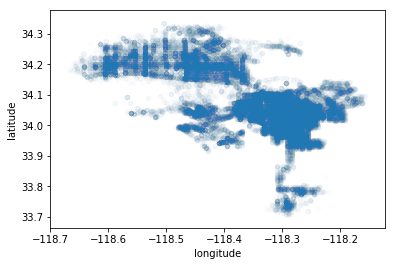

In [82]:
import matplotlib.pyplot as plt
df3.plot(kind="scatter", x="longitude", y="latitude", alpha=0.01)
plt.show()

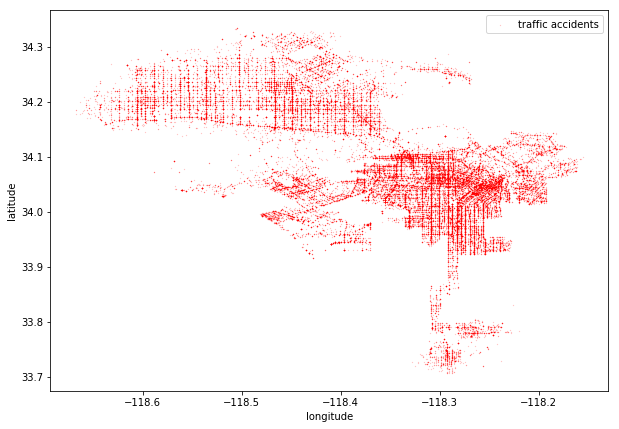

In [90]:
df3.plot(kind="scatter", x="longitude", y="latitude",
    s=0.05, label="traffic accidents",c="red",alpha=0.4, figsize=(10,7))
plt.show()

In [108]:
import gmplot
gmap = gmplot.GoogleMapPlotter(latmax, longmin, 16)

gmap.plot(df3['latitude'], df3['longitude'], 'cornflowerblue', edge_width=10)

gmap.draw("mymap.html")

In [139]:
mon_traf = df3[df3['Day of Week']=='Monday']
tues_traf = df3[df3['Day of Week']=='Tuesday']
wed_traf = df3[df3['Day of Week']=='Wednesday']
thu_traf = df3[df3['Day of Week']=='Thurdsay']
fri_traf = df3[df3['Day of Week']=='Friday']
sat_traf = df3[df3['Day of Week']=='Saturday']
sun_traf = df3[df3['Day of Week']=='Sunday']
weeks = [mon_traf,tues_traf,wed_traf,thu_traf,fri_traf,sat_traf,sun_traf]

In [140]:
sat_traf
type(sat_traf.iloc[0,4])

numpy.float64

In [141]:
sun_traf

,Date Reported,Time Occurred,Day of Week,latitude,longitude
254819,01/01/1072016,1950,Sunday,34.0037,-118.2878
267462,01/01/7032016,1345,Sunday,34.0174,-118.3089
267925,01/01/5012016,1300,Sunday,33.7315,-118.2879
279822,01/01/3272016,2100,Sunday,34.0388,-118.2717
279823,01/01/4102016,125,Sunday,34.0420,-118.2625
279825,01/01/4242016,1210,Sunday,34.0566,-118.2528
279838,01/01/1032016,310,Sunday,34.0402,-118.2598
279839,01/01/1032016,1450,Sunday,34.0407,-118.2541
279840,01/01/1032016,400,Sunday,34.0363,-118.2672
279846,01/01/1032016,2330,Sunday,34.0586,-118.2402
